In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time

import Featurizer as ft

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
pd.set_option('display.max_columns', 50)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]

In [4]:
df_train = pd.read_csv("../data/palabras.csv")

## Pre-processing

In [5]:
X = df_train.drop("precio", axis=1)
y = df_train['precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [6]:
X_train_submit = X_train.copy()

In [7]:
import category_encoders as ce

OHE = ce.OneHotEncoder( handle_unknown='ignore', use_cat_names=True)
BE = ce.BinaryEncoder( handle_unknown='ignore')

In [8]:
X_train = ft.preprocess(X_train, OHE, BE, 'train')
X_test = ft.preprocess(X_test, OHE, BE, 'test')

--- 26.564942836761475 seconds ---
--- 1.9926025867462158 seconds ---


In [9]:
print(f"Original shapes: X={X.shape} y={y.shape}")
print(f"Train shapes: X={X_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={X_test.shape}  y={y_test.shape}")

Original shapes: X=(240000, 80) y=(240000,)
Train shapes: X=(180000, 143) y=(180000,)
Test  shapes: X=(60000, 143)  y=(60000,)


## Feature Selection

In [10]:
#from sklearn.feature_selection import SelectKBest

In [11]:
#selection = SelectKBest(k=40)
#x_features = selection.fit_transform(X_train, y_train)
#columns = np.asarray(X_train.columns.values)
#support = np.asarray(selection.get_support())
#columns_with_support = columns[support]

In [13]:
#columns_with_support

## Training

In [14]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=1000,verbose=10,max_depth=10,
                                      max_leaf_nodes=60,random_state=42,
                                      
                                     )

In [15]:
start_time = time.time()
model.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

Binning 0.206 GB of data: 1.085 s
Fitting gradient boosted rounds:
[1/1000] 1 tree, 60 leaves, max depth = 9, in 0.277s
[2/1000] 1 tree, 60 leaves, max depth = 9, in 0.391s
[3/1000] 1 tree, 742 leaves, max depth = 10, in 1.408s
[4/1000] 1 tree, 60 leaves, max depth = 10, in 0.623s
[5/1000] 1 tree, 60 leaves, max depth = 10, in 0.390s
[6/1000] 1 tree, 60 leaves, max depth = 10, in 0.302s
[7/1000] 1 tree, 60 leaves, max depth = 10, in 1.280s
[8/1000] 1 tree, 60 leaves, max depth = 10, in 1.160s
[9/1000] 1 tree, 60 leaves, max depth = 9, in 0.861s
[10/1000] 1 tree, 60 leaves, max depth = 10, in 2.438s
[11/1000] 1 tree, 60 leaves, max depth = 10, in 0.393s
[12/1000] 1 tree, 60 leaves, max depth = 10, in 3.342s
[13/1000] 1 tree, 60 leaves, max depth = 9, in 2.460s
[14/1000] 1 tree, 60 leaves, max depth = 10, in 7.209s
[15/1000] 1 tree, 60 leaves, max depth = 10, in 0.187s
[16/1000] 1 tree, 60 leaves, max depth = 10, in 1.150s
[17/1000] 1 tree, 60 leaves, max depth = 10, in 0.317s
[18/1000] 

[148/1000] 1 tree, 60 leaves, max depth = 10, in 19.770s
[149/1000] 1 tree, 173 leaves, max depth = 10, in 13.377s
[150/1000] 1 tree, 60 leaves, max depth = 10, in 0.174s
[151/1000] 1 tree, 60 leaves, max depth = 10, in 0.157s
[152/1000] 1 tree, 60 leaves, max depth = 10, in 0.140s
[153/1000] 1 tree, 60 leaves, max depth = 10, in 0.096s
[154/1000] 1 tree, 60 leaves, max depth = 10, in 0.096s
[155/1000] 1 tree, 383 leaves, max depth = 10, in 35.388s
[156/1000] 1 tree, 60 leaves, max depth = 10, in 0.107s
[157/1000] 1 tree, 60 leaves, max depth = 10, in 0.111s
[158/1000] 1 tree, 60 leaves, max depth = 10, in 0.100s
[159/1000] 1 tree, 60 leaves, max depth = 10, in 20.595s
[160/1000] 1 tree, 355 leaves, max depth = 10, in 36.961s
[161/1000] 1 tree, 142 leaves, max depth = 10, in 4.462s
[162/1000] 1 tree, 60 leaves, max depth = 10, in 1.068s
[163/1000] 1 tree, 60 leaves, max depth = 10, in 0.528s
[164/1000] 1 tree, 60 leaves, max depth = 10, in 0.166s
[165/1000] 1 tree, 253 leaves, max dept

[294/1000] 1 tree, 60 leaves, max depth = 10, in 0.133s
[295/1000] 1 tree, 60 leaves, max depth = 10, in 0.138s
[296/1000] 1 tree, 60 leaves, max depth = 10, in 0.123s
[297/1000] 1 tree, 152 leaves, max depth = 10, in 0.202s
[298/1000] 1 tree, 60 leaves, max depth = 10, in 0.163s
[299/1000] 1 tree, 60 leaves, max depth = 10, in 0.195s
[300/1000] 1 tree, 60 leaves, max depth = 10, in 0.123s
[301/1000] 1 tree, 60 leaves, max depth = 10, in 0.143s
[302/1000] 1 tree, 60 leaves, max depth = 10, in 0.140s
[303/1000] 1 tree, 60 leaves, max depth = 10, in 0.185s
[304/1000] 1 tree, 60 leaves, max depth = 10, in 0.130s
[305/1000] 1 tree, 60 leaves, max depth = 10, in 0.147s
[306/1000] 1 tree, 60 leaves, max depth = 10, in 0.152s
[307/1000] 1 tree, 204 leaves, max depth = 10, in 0.271s
[308/1000] 1 tree, 60 leaves, max depth = 10, in 0.132s
[309/1000] 1 tree, 202 leaves, max depth = 10, in 0.270s
[310/1000] 1 tree, 60 leaves, max depth = 10, in 0.124s
[311/1000] 1 tree, 60 leaves, max depth = 10,

[440/1000] 1 tree, 60 leaves, max depth = 10, in 0.120s
[441/1000] 1 tree, 60 leaves, max depth = 10, in 0.131s
[442/1000] 1 tree, 60 leaves, max depth = 10, in 0.126s
[443/1000] 1 tree, 124 leaves, max depth = 10, in 0.202s
[444/1000] 1 tree, 60 leaves, max depth = 10, in 0.118s
[445/1000] 1 tree, 60 leaves, max depth = 10, in 0.123s
[446/1000] 1 tree, 172 leaves, max depth = 10, in 0.225s
[447/1000] 1 tree, 122 leaves, max depth = 10, in 0.169s
[448/1000] 1 tree, 324 leaves, max depth = 10, in 0.371s
[449/1000] 1 tree, 60 leaves, max depth = 10, in 0.120s
[450/1000] 1 tree, 210 leaves, max depth = 10, in 0.257s
[451/1000] 1 tree, 60 leaves, max depth = 10, in 0.126s
[452/1000] 1 tree, 60 leaves, max depth = 10, in 0.124s
[453/1000] 1 tree, 60 leaves, max depth = 10, in 0.122s
[454/1000] 1 tree, 60 leaves, max depth = 10, in 0.114s
[455/1000] 1 tree, 195 leaves, max depth = 10, in 0.237s
[456/1000] 1 tree, 60 leaves, max depth = 10, in 0.133s
[457/1000] 1 tree, 60 leaves, max depth = 

[586/1000] 1 tree, 312 leaves, max depth = 10, in 0.387s
[587/1000] 1 tree, 60 leaves, max depth = 10, in 0.147s
[588/1000] 1 tree, 60 leaves, max depth = 10, in 0.135s
[589/1000] 1 tree, 403 leaves, max depth = 10, in 0.410s
[590/1000] 1 tree, 60 leaves, max depth = 10, in 0.128s
[591/1000] 1 tree, 60 leaves, max depth = 10, in 0.137s
[592/1000] 1 tree, 155 leaves, max depth = 10, in 0.241s
[593/1000] 1 tree, 229 leaves, max depth = 10, in 0.301s
[594/1000] 1 tree, 60 leaves, max depth = 10, in 0.133s
[595/1000] 1 tree, 60 leaves, max depth = 10, in 0.130s
[596/1000] 1 tree, 60 leaves, max depth = 10, in 0.109s
[597/1000] 1 tree, 432 leaves, max depth = 10, in 0.448s
[598/1000] 1 tree, 60 leaves, max depth = 10, in 0.124s
[599/1000] 1 tree, 60 leaves, max depth = 10, in 0.110s
[600/1000] 1 tree, 60 leaves, max depth = 10, in 0.168s
[601/1000] 1 tree, 60 leaves, max depth = 10, in 0.136s
[602/1000] 1 tree, 60 leaves, max depth = 10, in 0.131s
[603/1000] 1 tree, 60 leaves, max depth = 1

[732/1000] 1 tree, 60 leaves, max depth = 10, in 0.136s
[733/1000] 1 tree, 60 leaves, max depth = 10, in 0.112s
[734/1000] 1 tree, 77 leaves, max depth = 10, in 0.350s
[735/1000] 1 tree, 60 leaves, max depth = 10, in 0.178s
[736/1000] 1 tree, 150 leaves, max depth = 10, in 0.231s
[737/1000] 1 tree, 256 leaves, max depth = 10, in 0.663s
[738/1000] 1 tree, 128 leaves, max depth = 10, in 0.192s
[739/1000] 1 tree, 60 leaves, max depth = 10, in 0.131s
[740/1000] 1 tree, 295 leaves, max depth = 10, in 0.359s
[741/1000] 1 tree, 107 leaves, max depth = 10, in 0.164s
[742/1000] 1 tree, 60 leaves, max depth = 10, in 0.118s
[743/1000] 1 tree, 60 leaves, max depth = 10, in 0.171s
[744/1000] 1 tree, 293 leaves, max depth = 10, in 0.310s
[745/1000] 1 tree, 138 leaves, max depth = 10, in 0.205s
[746/1000] 1 tree, 60 leaves, max depth = 10, in 0.131s
[747/1000] 1 tree, 60 leaves, max depth = 10, in 0.140s
[748/1000] 1 tree, 60 leaves, max depth = 10, in 0.126s
[749/1000] 1 tree, 165 leaves, max depth 

[878/1000] 1 tree, 60 leaves, max depth = 10, in 0.121s
[879/1000] 1 tree, 60 leaves, max depth = 10, in 0.135s
[880/1000] 1 tree, 60 leaves, max depth = 10, in 0.131s
[881/1000] 1 tree, 312 leaves, max depth = 10, in 0.376s
[882/1000] 1 tree, 60 leaves, max depth = 10, in 0.119s
[883/1000] 1 tree, 60 leaves, max depth = 10, in 0.150s
[884/1000] 1 tree, 60 leaves, max depth = 10, in 0.127s
[885/1000] 1 tree, 60 leaves, max depth = 10, in 0.128s
[886/1000] 1 tree, 60 leaves, max depth = 10, in 0.108s
[887/1000] 1 tree, 60 leaves, max depth = 10, in 0.118s
[888/1000] 1 tree, 60 leaves, max depth = 10, in 0.128s
[889/1000] 1 tree, 270 leaves, max depth = 10, in 0.287s
[890/1000] 1 tree, 60 leaves, max depth = 10, in 0.156s
[891/1000] 1 tree, 60 leaves, max depth = 10, in 0.130s
[892/1000] 1 tree, 152 leaves, max depth = 10, in 0.217s
[893/1000] 1 tree, 60 leaves, max depth = 10, in 0.113s
[894/1000] 1 tree, 60 leaves, max depth = 10, in 0.117s
[895/1000] 1 tree, 60 leaves, max depth = 10,

## Predicciones

In [16]:
ft.predecir(model, X_train, y_train, X_test, y_test)

Entrenamiento: 93.0389%
Testeo: 81.8352%.
Mean abs error: 540812.2406.


In [23]:
plt.rcParams["figure.figsize"] = [15, 15]

importancia = model.feature_importances_

d = {'x':X_train.columns,'y':importancia}

df_importancia = pd.DataFrame(d)

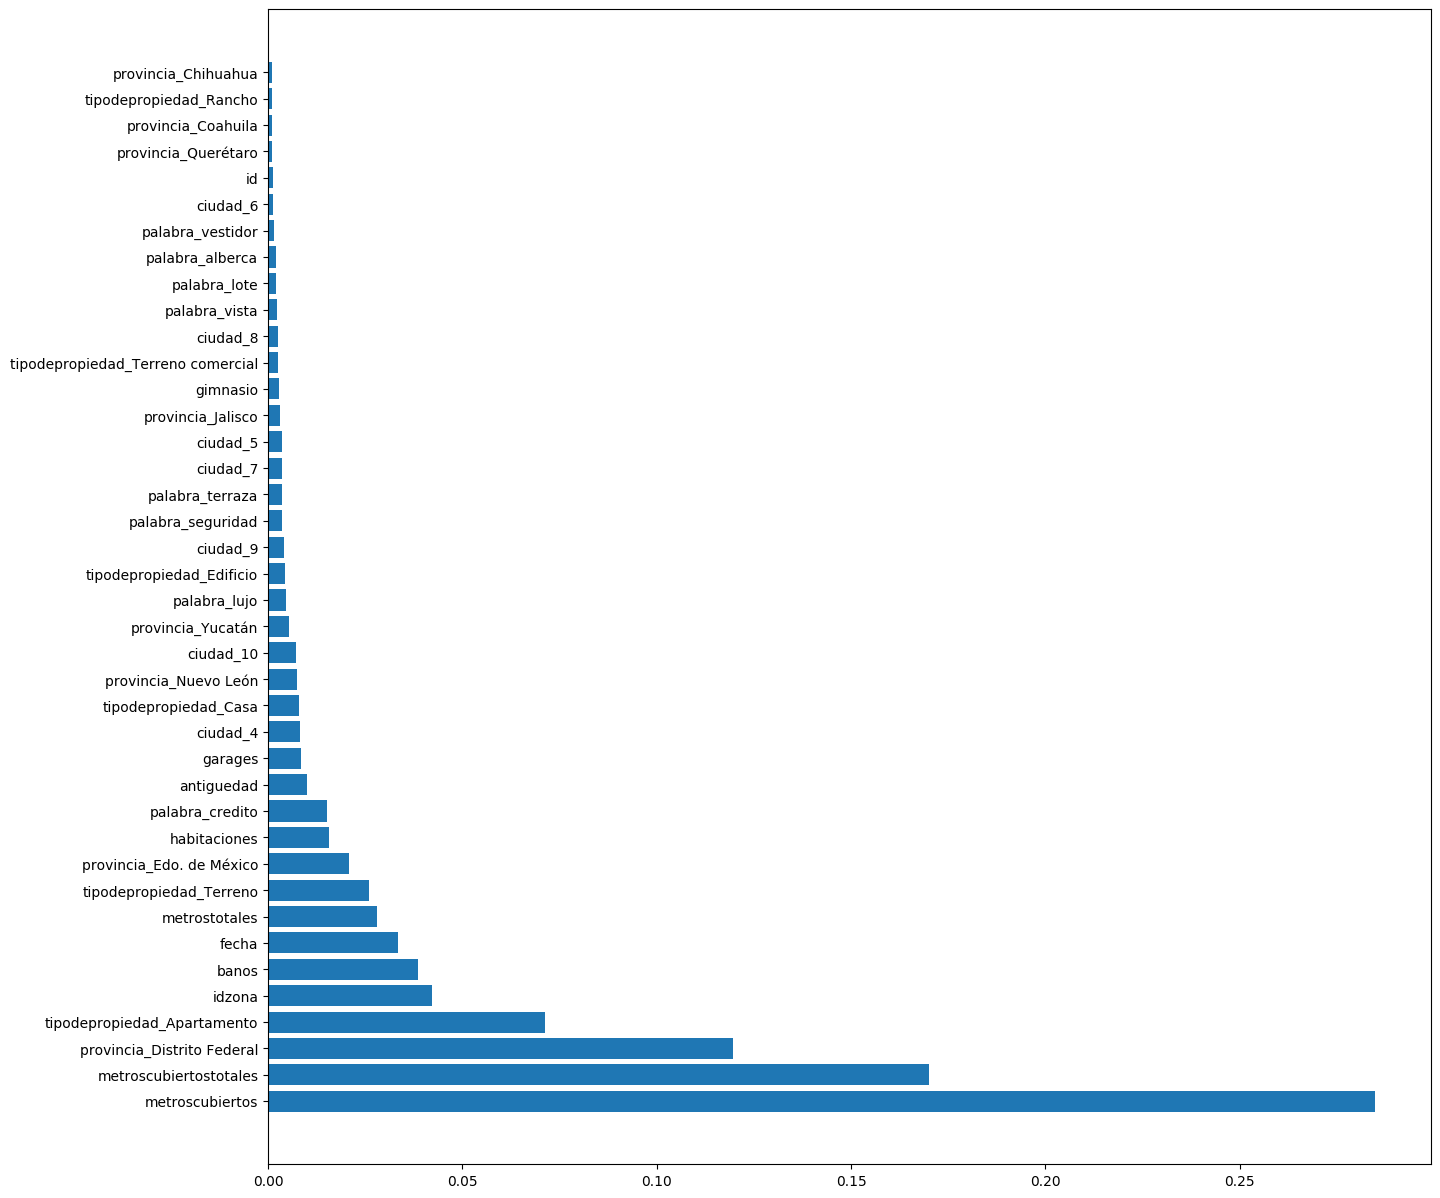

In [25]:
importancia = df_importancia.sort_values(by="y",ascending=False).head(40)
ax = plt.barh(importancia.x,importancia.y)

## Submission

In [22]:
df_test = pd.read_csv('../data/test.csv')

In [23]:
df = df_test.copy()
df = ft.init_test(df)

In [24]:
df = ft.preprocess(df, OHE, BE, 'test')

--- 2.866861343383789 seconds ---


In [25]:
submit_prediction = model.predict( df )

In [ ]:
#cols_diff = []
#ft = X_train.columns.values
#fs = df.columns.values
#for feat in fs:
#    if feat not in ft:
#        cols_diff.append(feat)
        
#display(cols_diff)        

In [ ]:
#pd.concat([df_test[['id']], pd.Series(submit_prediction)], axis=1).rename(columns={0:"target"}).to_csv("../data/submission13.csv", index=False)

In [26]:
from submission_helper import submission_output

output = submission_output(df_test, submit_prediction)

nombre_submit = 'histGradientBoostRegressor.csv'

output.to_csv('../data/'+nombre_submit, index=False)